# MOD 3 - FINAL PROJECT JUPYTER NOTEBOOK

Student: Denis Kelly

The Deliverables:<br>
 - The goal of your project is to query the database to get the data needed to perform a statistical analysis. In this statistical analysis, you'll need to perform a hypothesis test (or perhaps several) to answer the following question:<br>
     - __Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?__<br>
 - In addition to answering this question with a hypothesis test, you will also need to come up with at least 3 other hypotheses to test on your own. These can by anything that you think could be important information for the company.<br>
 - For this hypothesis, be sure to specify both the null hypothesis and the alternative hypothesis for your question. You should also specify if this is one-tail or a two-tail test.<br>
 - For online students, there will be four deliverables for this project:<br>
     - A Jupyter Notebook containing any code you've written for this project. This work will need to be pushed to your GitHub repository in order to submit your project.<br>
     - An organized README.md file in the GitHub repository that describes the contents of the repository. This file should be the source of information for navigating through the repository.<br>
     - A Blog Post.<br>
     - An "Executive Summary" PowerPoint Presentation that explains the hypothesis tests you ran, your findings, and their relevance to company stakeholders.<br>

### Hypothesis list:<br>
1. Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?
2. Does discount amount have a statistically significatn effect on the revenue of an order?
3. Are there regional differences in discounts or order sizes?
4. Who are top customers?  (just a placeholder - need a better hypothesis)
5. What else?
6. Are discounts given to certain customers?  Are there particular customers who receive a greater discount? (Does this matter?

# <font color=red>LIVE PROJECT CODE BELOW:</font>

## Explain here what framework I will be using for this project/examination - should be the OSEMN framework:
add in chart that Eli shared in beginning on overall data science method.

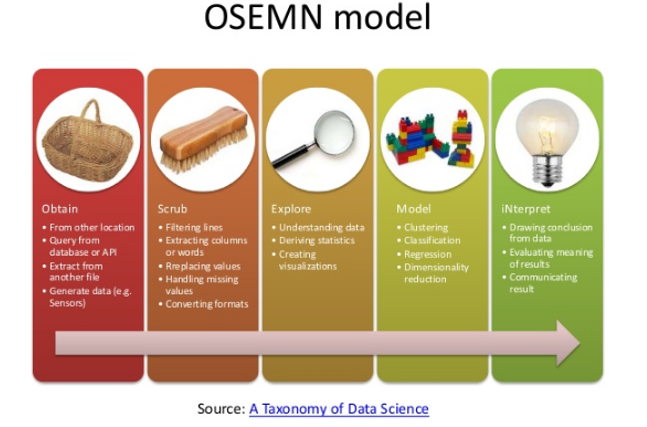

In [3]:
# Import the necessary Python libraries and packages for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from scipy import stats

In [4]:
# connect with the Northwind database through sql
connection = sqlite3.connect("Northwind_small.sqlite")
cursor = connection.cursor()

In [5]:
# list table names as a start of inspecting the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

# Begin the EDA for this project

In [6]:
# convert each table into a dataframe and inspect
employee_df = pd.read_sql_query("SELECT * FROM Employee;", connection)
employee_df.head()

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [7]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
Id                 9 non-null int64
LastName           9 non-null object
FirstName          9 non-null object
Title              9 non-null object
TitleOfCourtesy    9 non-null object
BirthDate          9 non-null object
HireDate           9 non-null object
Address            9 non-null object
City               9 non-null object
Region             9 non-null object
PostalCode         9 non-null object
Country            9 non-null object
HomePhone          9 non-null object
Extension          9 non-null object
Photo              0 non-null object
Notes              9 non-null object
ReportsTo          8 non-null float64
PhotoPath          9 non-null object
dtypes: float64(1), int64(1), object(16)
memory usage: 1.3+ KB


In [8]:
product_df = pd.read_sql_query("SELECT * FROM Product;", connection)
product_df.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [9]:
product_df.shape

(77, 10)

In [10]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
Id                 77 non-null int64
ProductName        77 non-null object
SupplierId         77 non-null int64
CategoryId         77 non-null int64
QuantityPerUnit    77 non-null object
UnitPrice          77 non-null float64
UnitsInStock       77 non-null int64
UnitsOnOrder       77 non-null int64
ReorderLevel       77 non-null int64
Discontinued       77 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB


### Could be an issue in the above "info" where "QuantityPerUnit" is an Object...

### Where is the "ProductID" attribute in the "Product" table?  don't see it when running "info" function and it is listed in the ERD diagram??

In [11]:
product_df.describe()

,Id,SupplierId,CategoryId,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,13.649351,4.116883,28.866364,40.506494,10.129870,12.467532,0.103896
std,22.371857,8.220267,2.395028,33.815111,36.147222,23.141072,10.931105,0.307127
min,1.000000,1.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7.000000,2.000000,13.250000,15.000000,0.000000,0.000000,0.000000
50%,39.000000,13.000000,4.000000,19.500000,26.000000,0.000000,10.000000,0.000000
75%,58.000000,20.000000,6.000000,33.250000,61.000000,0.000000,25.000000,0.000000
max,77.000000,29.000000,8.000000,263.500000,125.000000,100.000000,30.000000,1.000000


In [12]:
product_df['CategoryId'].unique()

array([1, 2, 7, 6, 8, 4, 3, 5], dtype=int64)

In [13]:
product_df['ProductName'].unique()

array(['Chai', 'Chang', 'Aniseed Syrup', "Chef Anton's Cajun Seasoning",
       "Chef Anton's Gumbo Mix", "Grandma's Boysenberry Spread",
       "Uncle Bob's Organic Dried Pears", 'Northwoods Cranberry Sauce',
       'Mishi Kobe Niku', 'Ikura', 'Queso Cabrales',
       'Queso Manchego La Pastora', 'Konbu', 'Tofu', 'Genen Shouyu',
       'Pavlova', 'Alice Mutton', 'Carnarvon Tigers',
       'Teatime Chocolate Biscuits', "Sir Rodney's Marmalade",
       "Sir Rodney's Scones", "Gustaf's Knäckebröd", 'Tunnbröd',
       'Guaraná Fantástica', 'NuNuCa Nuß-Nougat-Creme',
       'Gumbär Gummibärchen', 'Schoggi Schokolade', 'Rössle Sauerkraut',
       'Thüringer Rostbratwurst', 'Nord-Ost Matjeshering',
       'Gorgonzola Telino', 'Mascarpone Fabioli', 'Geitost',
       'Sasquatch Ale', 'Steeleye Stout', 'Inlagd Sill', 'Gravad lax',
       'Côte de Blaye', 'Chartreuse verte', 'Boston Crab Meat',
       "Jack's New England Clam Chowder", 'Singaporean Hokkien Fried Mee',
       'Ipoh Coffee', 'Gula

In [14]:
category_df = pd.read_sql_query("SELECT * FROM Category;", connection)
category_df.head(10)

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


### ERD of the Order Detail table:

In [15]:
order_detail_df = pd.read_sql_query("SELECT * FROM OrderDetail;", connection)
order_detail_df.tail()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
2150,11077/64,11077,64,33.25,2,0.03
2151,11077/66,11077,66,17.00,1,0.00
2152,11077/73,11077,73,15.00,2,0.01
2153,11077/75,11077,75,7.75,4,0.00
2154,11077/77,11077,77,13.00,2,0.00


In [16]:
order_detail_df.shape

(2155, 6)

In [17]:
order_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB


In [18]:
order_detail_df.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


In [19]:
quantity_total = order_detail_df['Quantity'].sum()
print(quantity_total)

51317


In [20]:
order_detail_df['TotalNetRevenue'] = order_detail_df['UnitPrice'] * order_detail_df['Quantity'] * (1-order_detail_df['Discount'])
order_detail_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,TotalNetRevenue
0,10248/11,10248,11,14.0,12,0.0,168.0
1,10248/42,10248,42,9.8,10,0.0,98.0
2,10248/72,10248,72,34.8,5,0.0,174.0
3,10249/14,10249,14,18.6,9,0.0,167.4
4,10249/51,10249,51,42.4,40,0.0,1696.0


In [21]:
order_detail_df.tail()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,TotalNetRevenue
2150,11077/64,11077,64,33.25,2,0.03,64.505
2151,11077/66,11077,66,17.00,1,0.00,17.000
2152,11077/73,11077,73,15.00,2,0.01,29.700
2153,11077/75,11077,75,7.75,4,0.00,31.000
2154,11077/77,11077,77,13.00,2,0.00,26.000


In [22]:
revenue_total = order_detail_df['TotalNetRevenue'].sum()
print(revenue_total)

1265793.0395


In [23]:
order_detail_df['Discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [24]:
order_detail_df['Discount'].value_counts(normalize=True)

0.00    0.611137
0.05    0.085847
0.10    0.080278
0.20    0.074710
0.15    0.072854
0.25    0.071462
0.03    0.001392
0.02    0.000928
0.01    0.000464
0.04    0.000464
0.06    0.000464
Name: Discount, dtype: float64

### Discounts of 6% and less than 5% are outliers for the sake of this discussion.

In [25]:
order_detail_df['Discount'].unique()

array([0.  , 0.15, 0.05, 0.2 , 0.25, 0.1 , 0.02, 0.03, 0.04, 0.06, 0.01])

In [26]:
order_detail_with_discounts_df = order_detail_df.loc[order_detail_df['Discount']>=0.05]

In [27]:
order_detail_with_discounts_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,TotalNetRevenue
6,10250/51,10250,51,42.4,35,0.15,1261.40
7,10250/65,10250,65,16.8,15,0.15,214.20
8,10251/22,10251,22,16.8,6,0.05,95.76
9,10251/57,10251,57,15.6,15,0.05,222.30
11,10252/20,10252,20,64.8,40,0.05,2462.40


In [28]:
order_detail_with_discounts_df['Discount'].value_counts()

0.05    185
0.10    173
0.20    161
0.15    157
0.25    154
0.06      1
Name: Discount, dtype: int64

<BarContainer object of 6 artists>

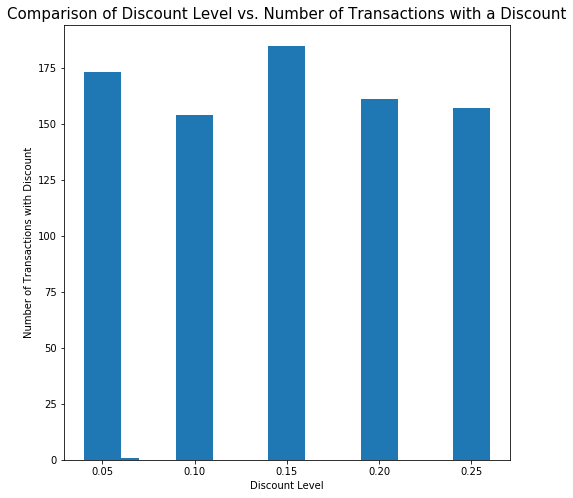

In [114]:
# chart out the amount of discounts given
plt.figure(figsize=(8,8))
y = order_detail_with_discounts_df['Discount'].value_counts()
x = order_detail_with_discounts_df['Discount'].unique()

plt.xlabel('Discount Level')
plt.ylabel('Number of Transactions with Discount')

plt.title('Comparison of Discount Level vs. Number of Transactions with a Discount', fontsize=15)

plt.bar(x,y, width=0.02)

In [30]:
order_detail_no_discounts_df = order_detail_df.loc[order_detail_df['Discount']==0]
order_detail_no_discounts_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,TotalNetRevenue
0,10248/11,10248,11,14.0,12,0.0,168.0
1,10248/42,10248,42,9.8,10,0.0,98.0
2,10248/72,10248,72,34.8,5,0.0,174.0
3,10249/14,10249,14,18.6,9,0.0,167.4
4,10249/51,10249,51,42.4,40,0.0,1696.0


In [31]:
order_detail_no_discounts_df.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount,TotalNetRevenue
count,1317.000000,1317.000000,1317.000000,1317.000000,1317.0,1317.000000
mean,10662.791951,41.396355,26.171534,21.715262,0.0,570.006538
std,244.835366,22.217410,29.717354,17.507493,0.0,961.375030
min,10248.000000,1.000000,2.000000,1.000000,0.0,4.800000
25%,10448.000000,23.000000,12.000000,10.000000,0.0,142.500000
50%,10671.000000,41.000000,18.400000,18.000000,0.0,325.000000
75%,10879.000000,60.000000,32.800000,30.000000,0.0,640.000000
max,11077.000000,77.000000,263.500000,130.000000,0.0,15810.000000


In [32]:
order_detail_with_discounts_df.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount,TotalNetRevenue
count,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000
mean,10650.444043,39.892900,26.264801,27.323706,0.145439,619.502141
std,233.645698,22.016846,30.074243,20.726850,0.071269,984.096182
min,10250.000000,1.000000,2.000000,1.000000,0.050000,8.500000
25%,10451.000000,21.000000,12.250000,12.000000,0.100000,167.175000
50%,10643.000000,40.000000,18.000000,20.000000,0.150000,352.000000
75%,10844.000000,59.000000,31.230000,36.000000,0.200000,697.320000
max,11077.000000,77.000000,263.500000,130.000000,0.250000,15019.500000


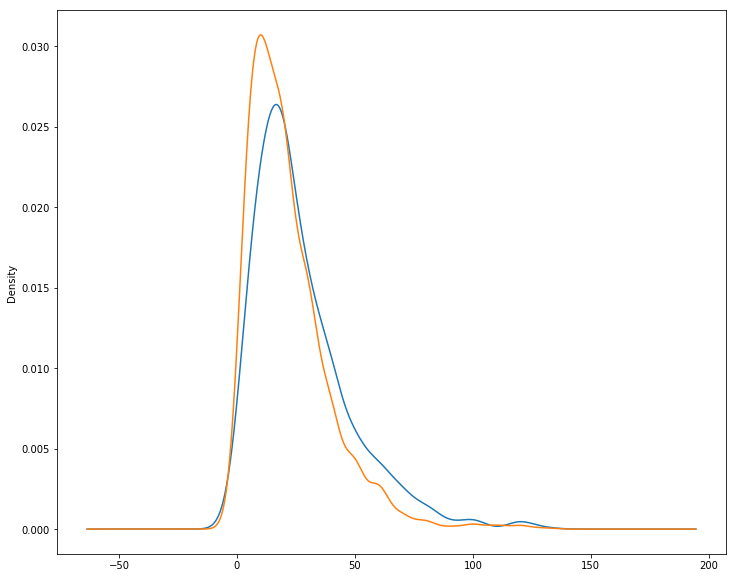

In [33]:
plt.figure(figsize=(12,10))
order_detail_with_discounts_df['Quantity'].plot.kde()
order_detail_no_discounts_df['Quantity'].plot.kde()
plt.show()

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


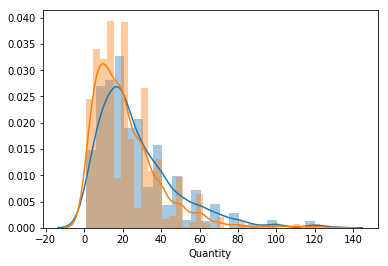

In [34]:
sns.distplot(order_detail_with_discounts_df['Quantity'])
sns.distplot(order_detail_no_discounts_df['Quantity'])

Above plot shows only slight differences among the mean and standard deviation of our two groups (discount and no discount) so this helps indicate that we need to further explore if the differences are statistically significant or not.

## Hypoethesis #1:
**_H<sub>0</sub>_: there is no relationship between the discount amount of a transaction and the quantity or product ordered.<br>
_H<sub>1</sub>_: there is a relatinoship between the discount amount of a trasacton and the quantity of product ordered.<br>**
<br>
We will set an alpha value at 0.05 and reject the null hypothesis if the p-value is greater than 0.05.<br>
This will be a one-tailed test because we want to know if a parameter from our treatment group is greater than or less than a corresponding parameter from our control group.<br>
Treatment group: orders that have a discount<br>
Control group: orders that have no discount.<br>
This will be a 2-sample t-test.

In [35]:
# produce a two-sample t-test for quantity sold with discount and without discount
review_t = stats.ttest_ind(order_detail_with_discounts_df['Quantity'], order_detail_no_discounts_df['Quantity'])
review_t

Ttest_indResult(statistic=6.727347255602609, pvalue=2.208943233062508e-11)

In [36]:
# produce a two-sample Welch's t-test for quantity sold with discount and without discount
review = stats.ttest_ind(order_detail_with_discounts_df['Quantity'], order_detail_no_discounts_df['Quantity'], equal_var=False)
review

Ttest_indResult(statistic=6.477345419129347, pvalue=1.2507374609266095e-10)

**_With our alpha value of 0.05 the above test has a p-value of much smaller than this so we can reject the null hypothesis that there is no difference between order quantity and amount of discount!_**<br><br>
Next we will measure the effect size of the experiment using Cohen's d statistic.  Cohen's d is one of the most common ways to measure effect size and is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable.<br><br>
A good rule of thumb for Cohen's d is:<br>
* Small effect = 0.2<br>
* Medium effect = 0.5<br>
* Large effect =0.8<br>


In [37]:
# define function to calculate Cohen's d statistic
def Cohens_d(group_1, group_2):
    diff = group_1.mean() - group_2.mean()
    n1, n2 = len(group_1), len(group_2)
    var1 = group_1.var()
    var2 = group_2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [38]:
Cohens_d(order_detail_with_discounts_df['Quantity'], order_detail_no_discounts_df['Quantity'])

0.2980297560154542

Therefore, with an effect size of 0.29 this would be a slightly larger than Small effect but would not significantly impact our experiment.

***
# HYPOTHESIS #2
Our next hypothesis would be to compare the revenue generated from discounted vs. non-discounted orders and to try to confirm if more revenue on average is generated from discounted vs. non-discounted orders?<br><br>
We have already created a "TotalNetRevenue" column in our dataframe so let's use this to experiment.

**_H<sub>0</sub>_: there is no relationship between the discount amount of a transaction and the net revenue generated.<br>
_H<sub>1</sub>_: there is a relatinoship between the discount amount of a trasacton and the net revenue generated.<br>**
<br>

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


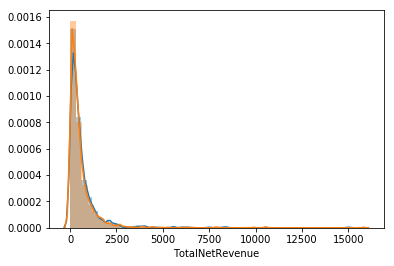

In [39]:
sns.distplot(order_detail_with_discounts_df['TotalNetRevenue'])
sns.distplot(order_detail_no_discounts_df['TotalNetRevenue'])

In [40]:
# produce a two-sample t-test for Total Net Revenue generated by transactions with discount and without discount
review_revenue = stats.ttest_ind(order_detail_with_discounts_df['TotalNetRevenue'], order_detail_no_discounts_df['TotalNetRevenue'], equal_var=False)
review_revenue

Ttest_indResult(statistic=1.145444434742818, pvalue=0.2521831610283653)

In [41]:
Cohens_d(order_detail_with_discounts_df['TotalNetRevenue'], order_detail_no_discounts_df['TotalNetRevenue'])

0.051014387990217305

### Conclusion for Hypothesis #2:
With a pvalue higher than the expected threshold (result came in at 0.252 vs. expected of 0.05) we can conclude that there is little chance of a relationship between the two variables of TotalNetRevenue and Discounts given.

***

## NEW HYPOTHESIS #3: Is there a difference between order quantity and level of discount?

The method is to segregate out orders from discount vs. non-discounted (i.e. control vs. experiment).  Then within the grouping of discounted orders break out the level of discounts (5%, 10%, 15%, etc.) and look at the average of units ordered for each level of discount.  Let's develop our hypothesis and then run a t-test.

**_H<sub>0</sub>_: there is no relationship between a specific discount level (i.e. 5% off, 10% off, etc.) and the quantity or product ordered.<br>
_H<sub>1</sub>_: there is a relatinoship between a specific discount level and the quantity of product ordered.<br>**
<br>
We will set an alpha value at 0.05 and reject the null hypothesis if the p-value is greater than 0.05.<br>
This will be a one-tailed test because we want to know if a parameter from our treatment group is greater than or less than a corresponding parameter from our control group.<br>
Treatment group: orders that have a discount at specific levels (5%, 10%, 15%, 20%, 25%)<br>
Control group: orders that have no discount.<br>
This will be a 2-sample t-test.

- Create a dataframe with a summary of level of discount, count of orders and average order quantity.

In [42]:
discount_levels = order_detail_with_discounts_df['Discount'].unique()
discount_levels.sort()
print(discount_levels)

[0.05 0.06 0.1  0.15 0.2  0.25]


- Run a t-test at %5 discount vs. no-discount quantities

In [43]:
# produce a two-sample t-test for quantity sold with discount AT 5% and without discount
review_t_five = stats.ttest_ind(order_detail_with_discounts_df[order_detail_with_discounts_df['Discount']==0.05]['Quantity'], order_detail_no_discounts_df['Quantity'])
review_t_five

Ttest_indResult(statistic=4.418557901446638, pvalue=1.064949724167325e-05)

- With a super low p-value of 1.064949724167325e-05 we can say the null hypothesis can be rejected.  Let's run for other discounts now.

In [44]:
review_t_ten = stats.ttest_ind(order_detail_with_discounts_df[order_detail_with_discounts_df['Discount']==0.1]['Quantity'], order_detail_no_discounts_df['Quantity'])
review_t_ten

Ttest_indResult(statistic=2.423258752228738, pvalue=0.015500606526440095)

- With a much higher p-value of 0.015500606526440095 for the 10% discount as opposed to the 5% discount we can still reject the null hypothesis.  Let's continue.

In [45]:
review_t_fifteen = stats.ttest_ind(order_detail_with_discounts_df[order_detail_with_discounts_df['Discount']==0.15]['Quantity'], order_detail_no_discounts_df['Quantity'])
review_t_fifteen

Ttest_indResult(statistic=4.411192556207304, pvalue=1.1027809944864872e-05)

In [46]:
review_t_twenty = stats.ttest_ind(order_detail_with_discounts_df[order_detail_with_discounts_df['Discount']==0.2]['Quantity'], order_detail_no_discounts_df['Quantity'])
review_t_twenty

Ttest_indResult(statistic=3.6019486047561884, pvalue=0.00032631258591041463)

In [47]:
review_t_twenty_five = stats.ttest_ind(order_detail_with_discounts_df[order_detail_with_discounts_df['Discount']==0.25]['Quantity'], order_detail_no_discounts_df['Quantity'])
review_t_twenty_five

Ttest_indResult(statistic=4.304937285665697, pvalue=1.780928988051903e-05)

### Now, let's run Cohen's d test to determine significance of results.

In [48]:
Cohens_d(order_detail_with_discounts_df[order_detail_with_discounts_df['Discount']==0.05]['Quantity'], order_detail_no_discounts_df['Quantity'])

0.3468767736284544

In [49]:
Cohens_d(order_detail_with_discounts_df[order_detail_with_discounts_df['Discount']==0.1]['Quantity'], order_detail_no_discounts_df['Quantity'])

0.19594203057834086

In [50]:
Cohens_d(order_detail_with_discounts_df[order_detail_with_discounts_df['Discount']==0.15]['Quantity'], order_detail_no_discounts_df['Quantity'])

0.3724041317472808

In [51]:
Cohens_d(order_detail_with_discounts_df[order_detail_with_discounts_df['Discount']==0.2]['Quantity'], order_detail_no_discounts_df['Quantity'])

0.3007122542913553

In [52]:
Cohens_d(order_detail_with_discounts_df[order_detail_with_discounts_df['Discount']==0.25]['Quantity'], order_detail_no_discounts_df['Quantity'])

0.36659255652674416

### Hypothesis #3 conclusion: with all effect sizes lower than 0.5 we can conclude that there is a slightly larger than Small but still less than Medium effect size on our results.  This combined with the rejection of our null hypothesis allows us to state that there is no relationship between discount size and order quantity.


---

## Hypothesis 4: is there a relationship between CategoryId and discount?


In [122]:
order_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 7 columns):
Id                 2155 non-null object
OrderId            2155 non-null int64
ProductId          2155 non-null int64
UnitPrice          2155 non-null float64
Quantity           2155 non-null int64
Discount           2155 non-null float64
TotalNetRevenue    2155 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 117.9+ KB


In [123]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
Id                 77 non-null int64
ProductName        77 non-null object
SupplierId         77 non-null int64
CategoryId         77 non-null int64
QuantityPerUnit    77 non-null object
UnitPrice          77 non-null float64
UnitsInStock       77 non-null int64
UnitsOnOrder       77 non-null int64
ReorderLevel       77 non-null int64
Discontinued       77 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB


In [125]:
# join OrderDetail and Product tables in order to explore discounts and ProductId's
merged_Product_and_Order_Detail = pd.merge(product_df, order_detail_df, left_on="Id", right_on="ProductId", how="left")
print(merged_Product_and_Order_Detail.shape)
merged_Product_and_Order_Detail.head()

(2155, 17)


,Id_x,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice_x,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id_y,OrderId,ProductId,UnitPrice_y,Quantity,Discount,TotalNetRevenue
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10285/1,10285,1,14.4,45,0.20,518.4
1,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10294/1,10294,1,14.4,18,0.00,259.2
2,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10317/1,10317,1,14.4,20,0.00,288.0
3,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10348/1,10348,1,14.4,15,0.15,183.6
4,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10354/1,10354,1,14.4,12,0.00,172.8


In [54]:
product_df.shape

(77, 10)

In [55]:
order_detail_df.shape

(2155, 7)

Let's take a high level view of the TotalNetRevenue generated by Category:

In [56]:
Cat_and_Rev = merged_Product_and_Order_Detail.groupby('CategoryId')['TotalNetRevenue'].sum().head(10)
print(Cat_and_Rev)

CategoryId
1    267868.1800
2    106047.0850
3    167357.2250
4    234507.2850
5     95744.5875
6    163022.3595
7     99984.5800
8    131261.7375
Name: TotalNetRevenue, dtype: float64


In [57]:
Product_and_Order_Detail_discount = merged_Product_and_Order_Detail.loc[merged_Product_and_Order_Detail['Discount']>=0.05]
Product_and_Order_Detail_discount.head()

,Id_x,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice_x,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id_y,OrderId,ProductId,UnitPrice_y,Quantity,Discount,TotalNetRevenue
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10285/1,10285,1,14.4,45,0.20,518.4
3,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10348/1,10348,1,14.4,15,0.15,183.6
5,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10370/1,10370,1,14.4,15,0.15,183.6
9,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10522/1,10522,1,18.0,40,0.20,576.0
10,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10526/1,10526,1,18.0,8,0.15,122.4


In [58]:
Product_and_Order_Detail_discount.shape

(831, 17)

In [59]:
Product_and_Order_Detail_no_discount = merged_Product_and_Order_Detail.loc[merged_Product_and_Order_Detail['Discount']==0]
Product_and_Order_Detail_no_discount.head()

,Id_x,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice_x,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id_y,OrderId,ProductId,UnitPrice_y,Quantity,Discount,TotalNetRevenue
1,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10294/1,10294,1,14.4,18,0.0,259.2
2,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10317/1,10317,1,14.4,20,0.0,288.0
4,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10354/1,10354,1,14.4,12,0.0,172.8
6,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10406/1,10406,1,14.4,10,0.0,144.0
7,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10413/1,10413,1,14.4,24,0.0,345.6


In [60]:
Product_and_Order_Detail_no_discount.shape

(1317, 17)

Let's look at the visual relationship between TotalNetRevenue for transactions with a discount vs. transactions without a discount:

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


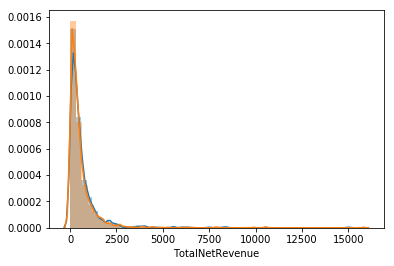

In [61]:
sns.distplot(Product_and_Order_Detail_discount['TotalNetRevenue'])
sns.distplot(Product_and_Order_Detail_no_discount['TotalNetRevenue'])

In [62]:
# produce a two-sample t-test for Total Net Revenue generated by transactions with discount and without discount
review_Category_revenue = stats.ttest_ind(Product_and_Order_Detail_discount['TotalNetRevenue'], Product_and_Order_Detail_no_discount['TotalNetRevenue'], equal_var=False)
review_Category_revenue

Ttest_indResult(statistic=1.1454444347428208, pvalue=0.25218316102836413)

In [63]:
Cohens_d(Product_and_Order_Detail_discount['TotalNetRevenue'], Product_and_Order_Detail_no_discount['TotalNetRevenue'])

0.051014387990217416

### Conclusion for Hypothesis #3:
With a pvalue higher than the expected threshold (result came in at 0.25218 vs. expected of 0.05) we can conclude that there is little chance of a relationship between the two variables of TotalNetRevenue for CategoryId and Discounts given for CategoryId.  In fact, given the similarities of the experiment, the pvalue was almost an exact match!  (don't think I ran this correctly since my assumptions are basically the same thing - do i need to further break out or break down the discounts by Category?)

In [64]:
Product_and_Order_Detail_no_discount.head()

,Id_x,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice_x,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id_y,OrderId,ProductId,UnitPrice_y,Quantity,Discount,TotalNetRevenue
1,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10294/1,10294,1,14.4,18,0.0,259.2
2,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10317/1,10317,1,14.4,20,0.0,288.0
4,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10354/1,10354,1,14.4,12,0.0,172.8
6,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10406/1,10406,1,14.4,10,0.0,144.0
7,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10413/1,10413,1,14.4,24,0.0,345.6


# Question #4:<br>
# Is there a statistically significant difference between the Unit Price of the Beverage Category and the quantity ordered for discounted items?

**_H<sub>0</sub>_: there is no relationship between the Unit Price of an item in the Beverage Category and the quantity of product ordered.<br>
_H<sub>1</sub>_: there is a relatinoship between the Unit Price of an item in the Beverage Category and the quantity of product ordered.<br>**
<br>

In [66]:
product_df['UnitPrice'].unique()

array([ 18.  ,  19.  ,  10.  ,  22.  ,  21.35,  25.  ,  30.  ,  40.  ,
        97.  ,  31.  ,  21.  ,  38.  ,   6.  ,  23.25,  15.5 ,  17.45,
        39.  ,  62.5 ,   9.2 ,  81.  ,   9.  ,   4.5 ,  14.  ,  31.23,
        43.9 ,  45.6 , 123.79,  25.89,  12.5 ,  32.  ,   2.5 ,  26.  ,
       263.5 ,  18.4 ,   9.65,  46.  ,  19.45,   9.5 ,  12.  ,  12.75,
        20.  ,  16.25,  53.  ,   7.  ,  32.8 ,   7.45,  24.  ,  19.5 ,
        13.25,  55.  ,  34.  ,  28.5 ,  49.3 ,  33.25,  21.05,  17.  ,
        36.  ,  15.  ,  21.5 ,  34.8 ,   7.75,  13.  ])

In [70]:
category_df.head(10)

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


In [77]:
product_df[product_df['CategoryId']==1].sort_values(by=['UnitPrice'])

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
23,24,Guaraná Fantástica,10,1,12 - 355 ml cans,4.50,20,0,0,1
74,75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,7.75,125,0,25,0
33,34,Sasquatch Ale,16,1,24 - 12 oz bottles,14.00,111,0,15,0
66,67,Laughing Lumberjack Lager,16,1,24 - 12 oz bottles,14.00,52,0,10,0
69,70,Outback Lager,7,1,24 - 355 ml bottles,15.00,15,10,30,0
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
34,35,Steeleye Stout,16,1,24 - 12 oz bottles,18.00,20,0,15,0
38,39,Chartreuse verte,18,1,750 cc per bottle,18.00,69,0,5,0
75,76,Lakkalikööri,23,1,500 ml,18.00,57,0,20,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0


In [78]:
merged_Product_and_Order_Detail.head()

,Id_x,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice_x,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id_y,OrderId,ProductId,UnitPrice_y,Quantity,Discount,TotalNetRevenue
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10285/1,10285,1,14.4,45,0.20,518.4
1,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10294/1,10294,1,14.4,18,0.00,259.2
2,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10317/1,10317,1,14.4,20,0.00,288.0
3,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10348/1,10348,1,14.4,15,0.15,183.6
4,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,10354/1,10354,1,14.4,12,0.00,172.8


In [84]:
merged_Product_and_Order_Detail[merged_Product_and_Order_Detail['CategoryId']==1][merged_Product_and_Order_Detail['Discount']>0].shape

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(158, 17)

In [117]:
bev_discounts = merged_Product_and_Order_Detail[merged_Product_and_Order_Detail['CategoryId']==1][merged_Product_and_Order_Detail['Discount']>0]
bev_discounts.describe()

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Id_x,SupplierId,CategoryId,UnitPrice_x,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,OrderId,ProductId,UnitPrice_y,Quantity,Discount,TotalNetRevenue
count,158.000000,158.000000,158.0,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,37.816456,11.164557,1.0,31.916139,43.924051,7.848101,16.898734,0.113924,10684.474684,37.816456,29.428481,27.949367,0.158228,726.632468
std,27.554656,7.404475,0.0,60.977805,37.092163,14.424933,9.537182,0.318729,249.769568,27.554656,55.208358,22.146529,0.068156,1738.654955
min,1.000000,1.000000,1.0,4.500000,15.000000,0.000000,0.000000,0.000000,10254.000000,1.000000,3.600000,2.000000,0.050000,18.600000
25%,2.000000,1.000000,1.0,14.000000,17.000000,0.000000,10.000000,0.000000,10469.750000,2.000000,12.000000,12.000000,0.100000,132.292500
50%,38.000000,12.000000,1.0,18.000000,20.000000,0.000000,17.500000,0.000000,10693.000000,38.000000,15.200000,20.500000,0.150000,278.550000
75%,70.000000,18.000000,1.0,19.000000,57.000000,10.000000,25.000000,0.000000,10899.750000,70.000000,18.000000,39.000000,0.200000,562.875000
max,76.000000,23.000000,1.0,263.500000,125.000000,40.000000,30.000000,1.000000,11077.000000,76.000000,263.500000,130.000000,0.250000,15019.500000


In [118]:
bev_discounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 2116
Data columns (total 17 columns):
Id_x               158 non-null int64
ProductName        158 non-null object
SupplierId         158 non-null int64
CategoryId         158 non-null int64
QuantityPerUnit    158 non-null object
UnitPrice_x        158 non-null float64
UnitsInStock       158 non-null int64
UnitsOnOrder       158 non-null int64
ReorderLevel       158 non-null int64
Discontinued       158 non-null int64
Id_y               158 non-null object
OrderId            158 non-null int64
ProductId          158 non-null int64
UnitPrice_y        158 non-null float64
Quantity           158 non-null int64
Discount           158 non-null float64
TotalNetRevenue    158 non-null float64
dtypes: float64(4), int64(10), object(3)
memory usage: 22.2+ KB


<BarContainer object of 5 artists>

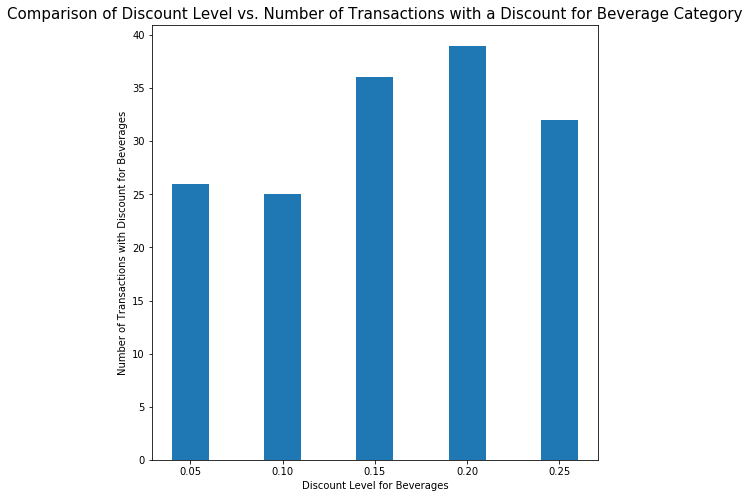

In [119]:
# chart out the amount of discounts given for Beverages
plt.figure(figsize=(8,8))
y = bev_discounts['Discount'].value_counts()
x = bev_discounts['Discount'].unique()

plt.xlabel('Discount Level for Beverages')
plt.ylabel('Number of Transactions with Discount for Beverages')

plt.title('Comparison of Discount Level vs. Number of Transactions with a Discount for Beverage Category', fontsize=15)

plt.bar(x,y, width=0.02)

In [120]:
# run an ANOVA test or OLS to compare the beverage category prices and compare vs. the quantity sold
formula = 'Quantity ~ UnitPrice_x'
lm = ols(formula, bev_discounts).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                   sum_sq     df         F    PR(>F)
UnitPrice_x     59.757451    1.0  0.121155  0.728254
Residual     76943.837486  156.0       NaN       NaN


In [121]:
# run an ANOVA test or OLS to compare the beverage category prices and compare vs. the quantity sold
formula_y = 'Quantity ~ UnitPrice_y'
lm_y = ols(formula_y, bev_discounts).fit()
table_y = sm.stats.anova_lm(lm_y, typ=2)
print(table_y)

                   sum_sq     df         F    PR(>F)
UnitPrice_y     25.753456    1.0  0.052191  0.819593
Residual     76977.841480  156.0       NaN       NaN


- Conclusion: with a low p_value (<0.05) as noted above, we can see that Unit Price is indeed statistically significant for the quantity ordered of items for those beverages sold with a discount.

## Conclusions:
- There is not a statistically significant difference between the level of discount and quantity of product ordered for all items in the North Wind Trading database.<br>
- There is not a statistically significant difference between the level of discount and the amount of revenue generated.<br>
- There is no relationship between the size of the discount given and the order quantity.
- In the Beverage category, there is no statisically significant difference between the discount given and the quantity ordered.

## Steps for further investigation:
- With little concrete findings for the relationship between discounts and quantity ordered on a higher level, more work should be done to understand if there is a relationship between discount and quantity ordered at the Category level.<br>
- This project did not take into account examining issues dealing with inventory levels, reorder points (levels) and out of stock situations.  There is ample area for discovery and investigation here including:<br>
 - is there a relationship between inventory levels, out of stock points and quantity sold?
 - is there a relationship between inventory levels over time (may be out of scope for this information and project) and quantity ordered?  In other words, do out of stocks impact quantity sold?